# GLASS IDENTIFICATION

In [1]:
pip install -U imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

In [3]:
glass = pd.read_csv(r"C:\Users\hp\Downloads\archive (7)\glass.csv")

In [4]:
glass.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
glass.describe()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [11]:
print(glass.columns)


Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass'], dtype='object')


In [18]:
glass.describe().T.style.background_gradient(cmap = 'plasma')

,count,mean,std,min,25%,50%,75%,max
RI,214.000000,1.518365,0.003037,1.511150,1.516522,1.517680,1.519157,1.533930
Na,214.000000,13.407850,0.816604,10.730000,12.907500,13.300000,13.825000,17.380000
Mg,214.000000,2.684533,1.442408,0.000000,2.115000,3.480000,3.600000,4.490000
Al,214.000000,1.444907,0.499270,0.290000,1.190000,1.360000,1.630000,3.500000
Si,214.000000,72.650935,0.774546,69.810000,72.280000,72.790000,73.087500,75.410000
K,214.000000,0.497056,0.652192,0.000000,0.122500,0.555000,0.610000,6.210000
Ca,214.000000,8.956963,1.423153,5.430000,8.240000,8.600000,9.172500,16.190000
Ba,214.000000,0.175047,0.497219,0.000000,0.000000,0.000000,0.000000,3.150000
Fe,214.000000,0.057009,0.097439,0.000000,0.000000,0.000000,0.100000,0.510000
Type of glass,214.000000,2.780374,2.103739,1.000000,1.000000,2.000000,3.000000,7.000000


In [13]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RI             214 non-null    float64
 1   Na             214 non-null    float64
 2   Mg             214 non-null    float64
 3   Al             214 non-null    float64
 4   Si             214 non-null    float64
 5   K              214 non-null    float64
 6   Ca             214 non-null    float64
 7   Ba             214 non-null    float64
 8   Fe             214 non-null    float64
 9   Type of glass  214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [14]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


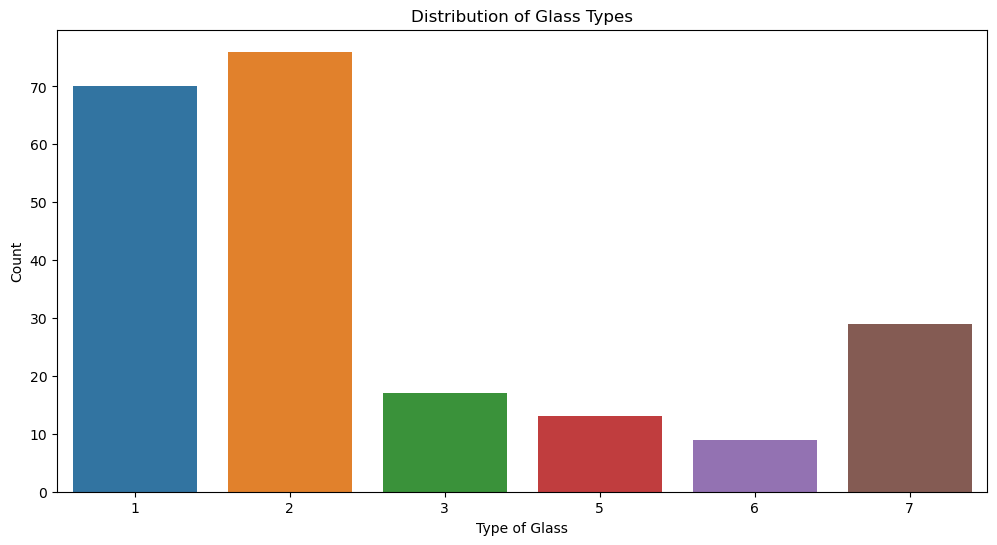

In [15]:

plt.figure(figsize=(12, 6))
sns.countplot(x='Type of glass', data=glass)
plt.title('Distribution of Glass Types')
plt.xlabel('Type of Glass')
plt.ylabel('Count')
plt.show()


In [19]:
glass.corr().style.background_gradient(cmap = 'plasma')

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type of glass,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


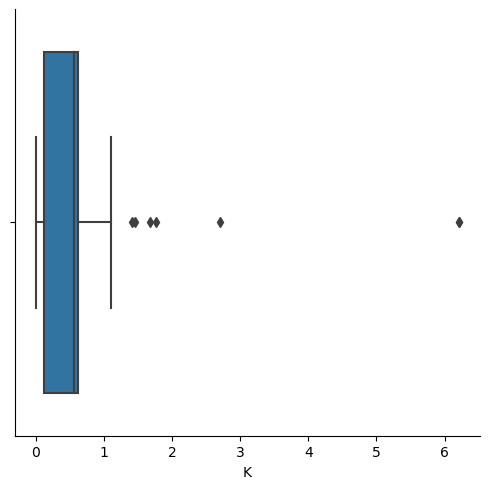

In [20]:
sns.catplot(x='K', kind='box', data=glass)

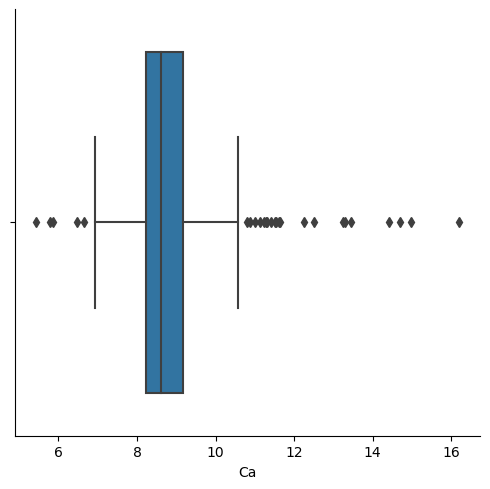

In [21]:
sns.catplot(x='Ca', kind='box', data=glass)

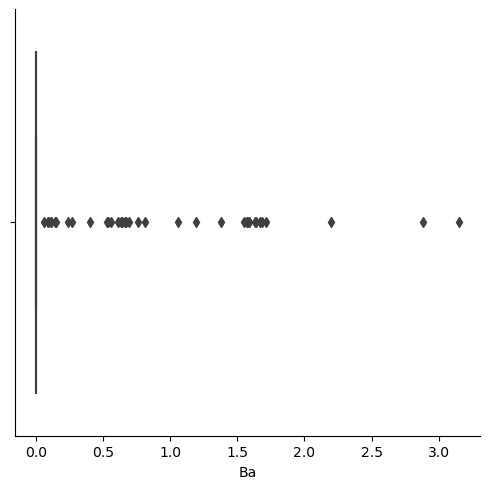

In [22]:
sns.catplot(x='Ba', kind='box', data=glass)

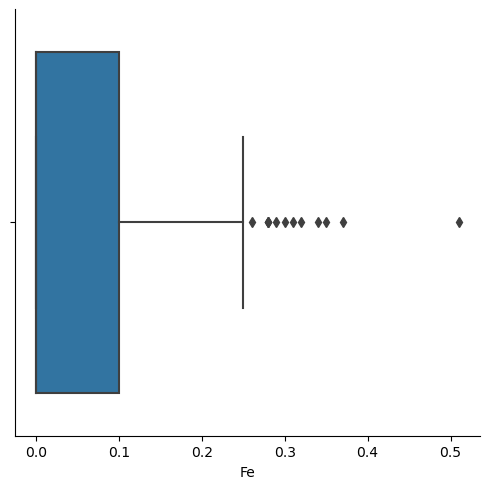

In [23]:
sns.catplot(x='Fe', kind='box', data=glass)

In [24]:
X = glass.drop('Type of glass', axis=1)
y = glass['Type of glass']                         #data preprocessing

In [25]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [26]:
y.shape

(456,)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)  # splitting data into testing and training data

In [28]:
random_forest = RandomForestClassifier(random_state = 0)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [29]:
predict = cross_val_predict(estimator = random_forest, X = X_train, y = y_train, cv = 5)
print("Classification Report: \n",classification_report(y_train, predict))

Classification Report: 
               precision    recall  f1-score   support

           1       0.74      0.65      0.70        49
           2       0.82      0.76      0.79        55
           3       0.77      0.89      0.82        53
           5       0.95      0.96      0.95        55
           6       0.98      1.00      0.99        53
           7       0.94      0.94      0.94        54

    accuracy                           0.87       319
   macro avg       0.87      0.87      0.87       319
weighted avg       0.87      0.87      0.87       319



In [30]:
ytest_pred = random_forest.predict(X_test)
print("Classification Report: \n",classification_report(y_test, ytest_pred))

Classification Report: 
               precision    recall  f1-score   support

           1       0.83      0.89      0.86        27
           2       0.89      0.76      0.82        21
           3       0.92      0.96      0.94        23
           5       1.00      0.95      0.98        21
           6       1.00      1.00      1.00        23
           7       0.96      1.00      0.98        22

    accuracy                           0.93       137
   macro avg       0.93      0.93      0.93       137
weighted avg       0.93      0.93      0.93       137

